Consider the set of event $A$ made of $M$ events $A_k$. Each event in $A$ is associated with the set $X$ made of $N$ conditional elements $x_i$ :

$$
A = \{ A_1, A_2, \cdot\cdot\cdot , A_{M} \} \\
X = \{ x_1, x_2, \cdot\cdot\cdot , x_{N} \}
$$

such that $P(A|x_{i})$ reads as *probility of event $A$ given condition $x_{i}$*

Baye's Theorem says:

$$
P(A_{k}~|x_{i}) = \frac{ P (x_{i}~|A_{k}) P(x_{i}) }{P(x_i)},
$$

however we also know *Sum Rule*:

$$
P(x_i) = \sum_{j=1}^{M}P(x_i~|A_j)P(A_j).
$$

Hence we can rewrite Baye's Theorem as:

$$
P(A~|x_{i}) = \frac{ P (x_{i}~|A_{k}) P(x_{i}) }{\sum_{j=1}^{M}P(x_i~|A_j)P(A_j)}.
$$

# **COVI19 TEST EXAMPLE:**

*Note:* We are going to generalize this example by using the place holder variables $\alpha, \beta, \gamma$ for the actual numerical values.

The set events $A$ is formed by the elemets $C$ and $NC$ (having the virus and not having the virus. Each event is associated with the conditional elements $+$ and $-$ (testing positive and testing negative.


$P(C) = \alpha~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$- probability of having the virus

$P(NC) = 1 - P(C) = 1- \alpha~~~~~~~~~~~~~$        - probability of not having the virus

$P(+|C) = \beta~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ - probability of testing positive and having the virus 

$P(-|C)  = 1- \beta ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ - probability of testing negative and having the virus (i.e. false negative)

$P(+|NC) = 1- \gamma~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ - probability of testing positive and not having the virus (i.e. false positive)

$P(-|NC) = \gamma ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ - probability of testing negative and not having the virus 


# The knowns:

A percentage $\alpha~\%$ of the population has the virus: $P(C) = \alpha$.

The test`s reliability (hit) is $\beta ~\%~~~~~~~~~$: $P(+|C) = \beta$

The test`s correct rejection is $\gamma~\%~~~~~$: $P(-|NC) = \gamma$

# The question/unknown quantity:

What is the probability of having the virus given a positive test result?

$P(C|+)~ =~ ?$

In [ ]:
# import packages

# computational packages
import numpy as np

# plotting packages
import matplotlib.pyplot as plt

In [ ]:
# defining functions

def Bayes(P_c, P_pos_c, P_neg_nc):

    P_nc = 1 - P_c # 1-alpha

    P_pos_nc = 1 - P_neg_nc # 1-gamma

    P_pos = P_pos_c * P_c + P_pos_nc * P_nc # summation rule

    P_c_pos = ( P_pos_c * P_c) / P_pos # Baye`s theorem

    return P_c_pos

In [ ]:
# In this section we are going to perform the computational part of this notebook

# For start, we are going to let the user input the necessary percentage data

alpha  = float( input("What is the percentage of people that have the virus? ") ) # the function input returns a string that is transformed into a number by the command float
while alpha > 1.0:
    alpha  = float( input(" Divide your number by 100 and then retype it. \n What is the percentage of people that have the virus? ") ) # we want to use numbers less than or equal to one due to the normalization requirement

beta   = float( input("What is the test's reliability (hit)? ") )
while beta > 1.0:
    beta  = float( input(" Divide your number by 100 and then retype it. \n What is the test's reliability (hit)? ") )

gamma   = float( input("What is the test`s correct rejection? ") )
while gamma > 1.0:
    gamma  = float( input(" Divide your number by 100 and then retype it. \n What is the test`s correct rejection? ") )

# call the Baye's function to return the probability of having the virus given a positive test result

P_c_pos = Bayes( alpha , beta, gamma )

print('\nThe probability of having the virus given a positive test result is : {0:.4g} %'.format(P_c_pos*100, ) )

What is the percentage of people that have the virus? 0.048
What is the test's reliability (hit)? 0.95
What is the test`s correct rejection? 0.79

The probability of having the virus given a positive test result is : 18.57 %


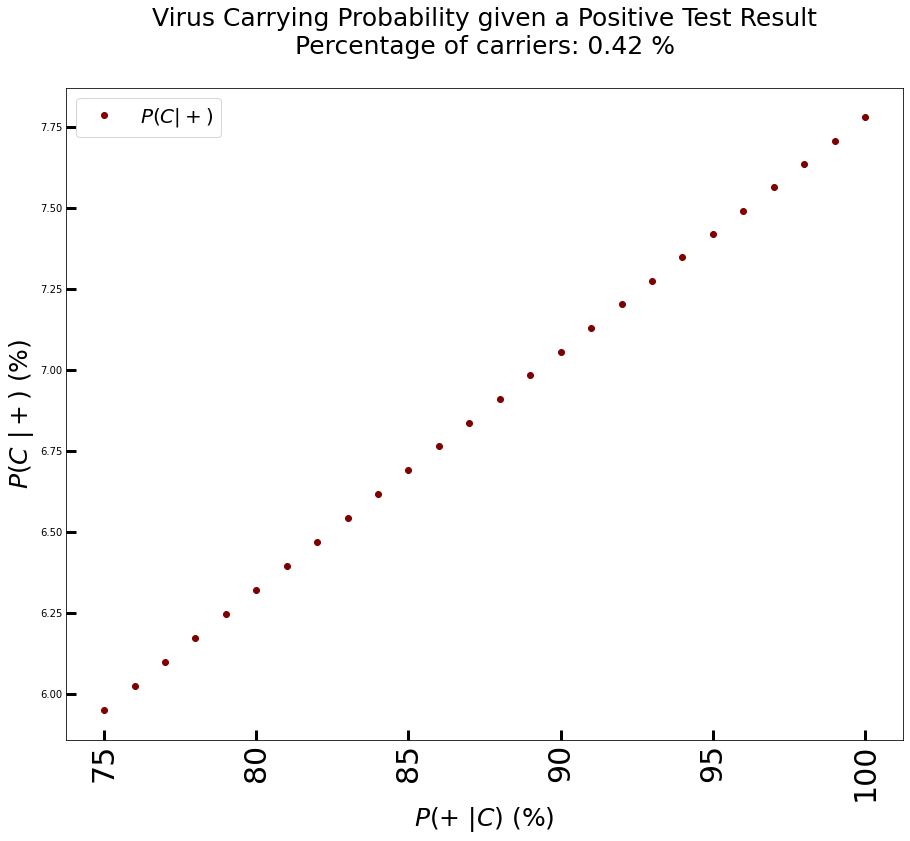

In [ ]:
# Next let's consider the probability of having the virus given a positive test result for a wide range of reliabilities

beta_list = np.arange(0.75, 1.01, 0.01) # create a list of values from 0.75 to 1.01 in steps of 0.01

P_c_pos_list = Bayes( alpha , beta_list, gamma ) # notice that our function can take both single numbers and list as its arguments



# Plotting results

plt.figure ( figsize = ( 15 , 12 ) )

plt.plot(beta_list*100, P_c_pos_list*100, 'o', color = 'maroon', label = '$P(C|+)$')  # plot command x-axis, y-axis

plt.legend(fontsize = 20) # plots the legend using the labels from above

# Plot title
plt.title('Virus Carrying Probability given a Positive Test Result\nPercentage of carriers: {0:.4g} %\n'.format(alpha*100, ), fontsize = 25)
# str(x) converts x to a string


# Plot Axes Lable 
plt.ylabel('$P(C~|+)$ (%)', fontsize=25) 
plt.xlabel('$P(+~|C)$ (%)' , fontsize=25)

# Feel free to addapt this template to your style of plotting, however keep in mind that we have to go through your code and UNDERSTAND WHAT YOU'RE DOING 
plt.tick_params(direction='in', length=10, width=3) # tick descriptions
plt.xticks((75.0, 80.0, 85.0, 90.0, 95.0, 100.0), fontsize=30, rotation=90)
plt.yticks(np.list(beta_list*100, 25.0, 50.0, 75.0, 100.0), fontsize=25, rotation=0) 


plt.show()




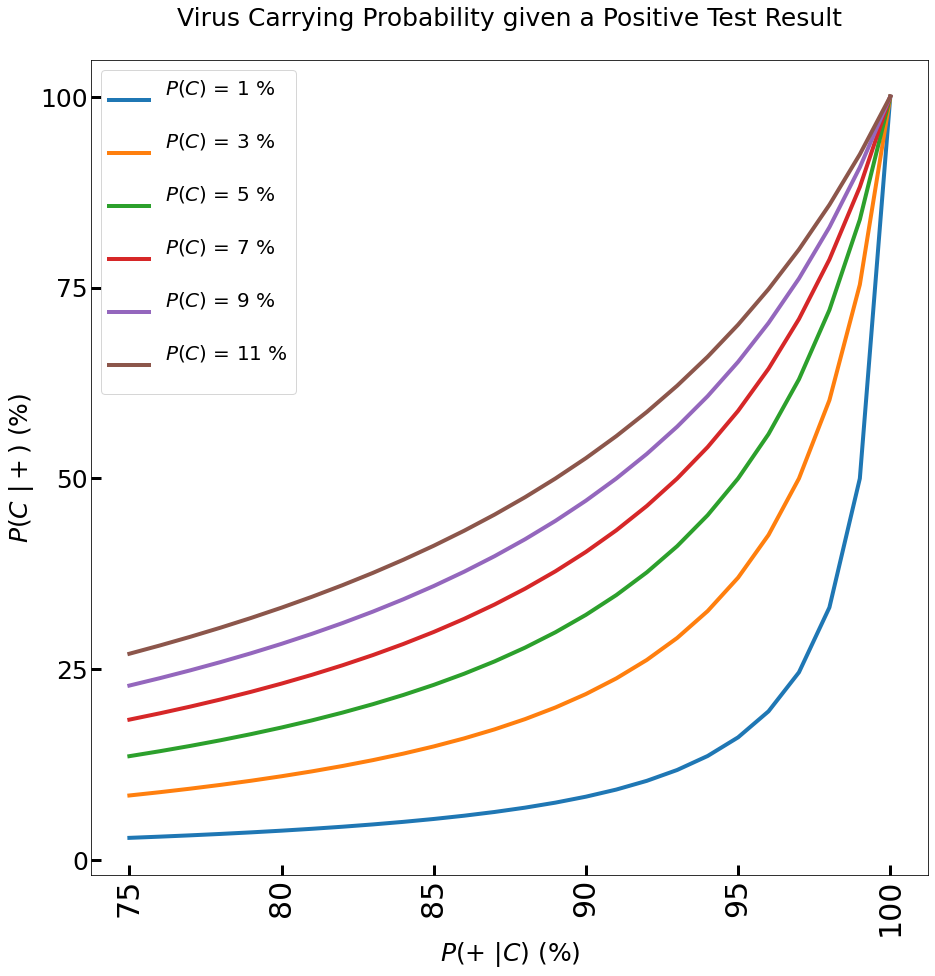

In [ ]:
# Next let's consider the probability of having the virus given a positive test result for a wide range of reliabilities and carriers

alpha_list = np.arange(0.01, 0.12, 0.02)
beta_list = np.arange(0.75, 1.01, 0.01) # create a list of values from 0.75 to 1.01 in steps of 0.01


# Plotting results

plt.figure ( figsize = ( 15 , 15 ) )

for alpha_value in alpha_list:

    P_c_pos_list = Bayes( alpha_value , beta_list ) #notece that I introduced the Baye's computation within the figure itself

    plt.plot(beta_list*100, P_c_pos_list*100, linewidth = 4.0, label = '$P(C)$ = {0:.4g} %\n'.format(alpha_value*100, ))  # plot command x-axis, y-axis

plt.legend(loc = 'upper left', fontsize = 20) # plots the legend using the labels from above

# Plot title
plt.title('Virus Carrying Probability given a Positive Test Result\n', fontsize = 25)
# str(x) converts x to a string


# Plot Axes Lable 
plt.ylabel('$P(C~|+)$ (%)', fontsize=25) 
plt.xlabel('$P(+~|C)$ (%)' , fontsize=25)

# Feel free to addapt this template to your style of plotting, however keep in mind that we have to go through your code and UNDERSTAND WHAT YOU'RE DOING 
plt.tick_params(direction='in', length=10, width=3) # tick descriptions
plt.xticks((75.0, 80.0, 85.0, 90.0, 95.0, 100.0), fontsize=30, rotation=90)
plt.yticks((0.0, 25.0, 50.0, 75.0, 100.0), fontsize=25, rotation=0) 


plt.show()